In [1]:
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
dataset=mnist.load_data()

In [64]:
(X_train,y_train),(X_test,y_test)=dataset

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

X_train=X_train/255
X_test=X_test/255

Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)

print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [65]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [66]:
width=28
height=28
batch_size=256
epochs=20
model=Sequential()
#Conv Layer-1
model.add(Conv2D(6,kernel_size=5,input_shape=(width,height,1),data_format='channels_last',padding='same',activation='relu'))

#Max Pool Layer-1
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Conv Layer-2
model.add(Conv2D(16,kernel_size=5,activation='relu'))

#Max Pool Layer-2
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Conv Layer-3
model.add(Conv2D(120,kernel_size=5,activation='relu'))
model.add(Flatten())

#Fully Connected Layer-1
model.add(Dense(84,activation='relu'))

#Softmax
model.add(Dense(10,activation='softmax'))


In [67]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_4 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 84)              

In [68]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 304us/step - loss: 0.4352 - accuracy: 0.8730 - val_loss: 0.1249 - val_accuracy: 0.9616
Epoch 2/20
60000/60000 [==============================] - 19s 315us/step - loss: 0.1000 - accuracy: 0.9700 - val_loss: 0.0683 - val_accuracy: 0.9793
Epoch 3/20
60000/60000 [==============================] - 19s 313us/step - loss: 0.0687 - accuracy: 0.9787 - val_loss: 0.0541 - val_accuracy: 0.9819
Epoch 4/20
60000/60000 [==============================] - 19s 318us/step - loss: 0.0534 - accuracy: 0.9831 - val_loss: 0.0461 - val_accuracy: 0.9857
Epoch 5/20
60000/60000 [==============================] - 20s 330us/step - loss: 0.0449 - accuracy: 0.9864 - val_loss: 0.0395 - val_accuracy: 0.9880
Epoch 6/20
60000/60000 [==============================] - 19s 315us/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0374 - val_accuracy: 0.9876
Epoch 7/20
60000/60000 [==============================] 

In [70]:
pred=model.evaluate(X_test,Y_test)
print("Score",pred[0])
print("Accuracy",pred[1])

10000/10000 [==============================] - 2s 168us/step
Score 0.03642255164982867
Accuracy 0.9891999959945679


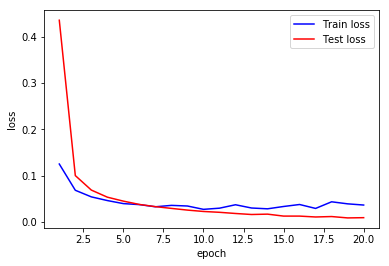

In [72]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

x=list(range(1,epochs+1))

vy=history.history['val_loss']
ty=history.history['loss']

def plt_dynamic(x,y,y_1,ax,colors=['b']):
    ax.plot(x,y,'b',label='Train loss')
    ax.plot(x,y_1,'r',label='Test loss')
    plt.legend()
    fig.canvas.draw()
plt_dynamic(x,vy,ty,ax)